In [1]:
!nvidia-smi

Thu May 16 08:44:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6e7oAynMkkC3hVxWIts7")
project = rf.workspace("solar-panel-defect-detection").project("solar-panel-defects-zd2ik")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
import os

In [6]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [9]:
from ultralytics import YOLO

from IPython.display import display, Image

In [10]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [11]:
from IPython.display import display, Image

In [17]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 batch=10 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 166MB/s]
New https://pypi.org/project/ultralytics/8.2.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Solar-panel-defects-1/data.yaml, epochs=100, patience=50, batch=10, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=Fals

In [15]:
!ls runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1715849347.404f22a5e685.6348.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch13410.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch13411.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch13412.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


In [16]:
from IPython.display import Image

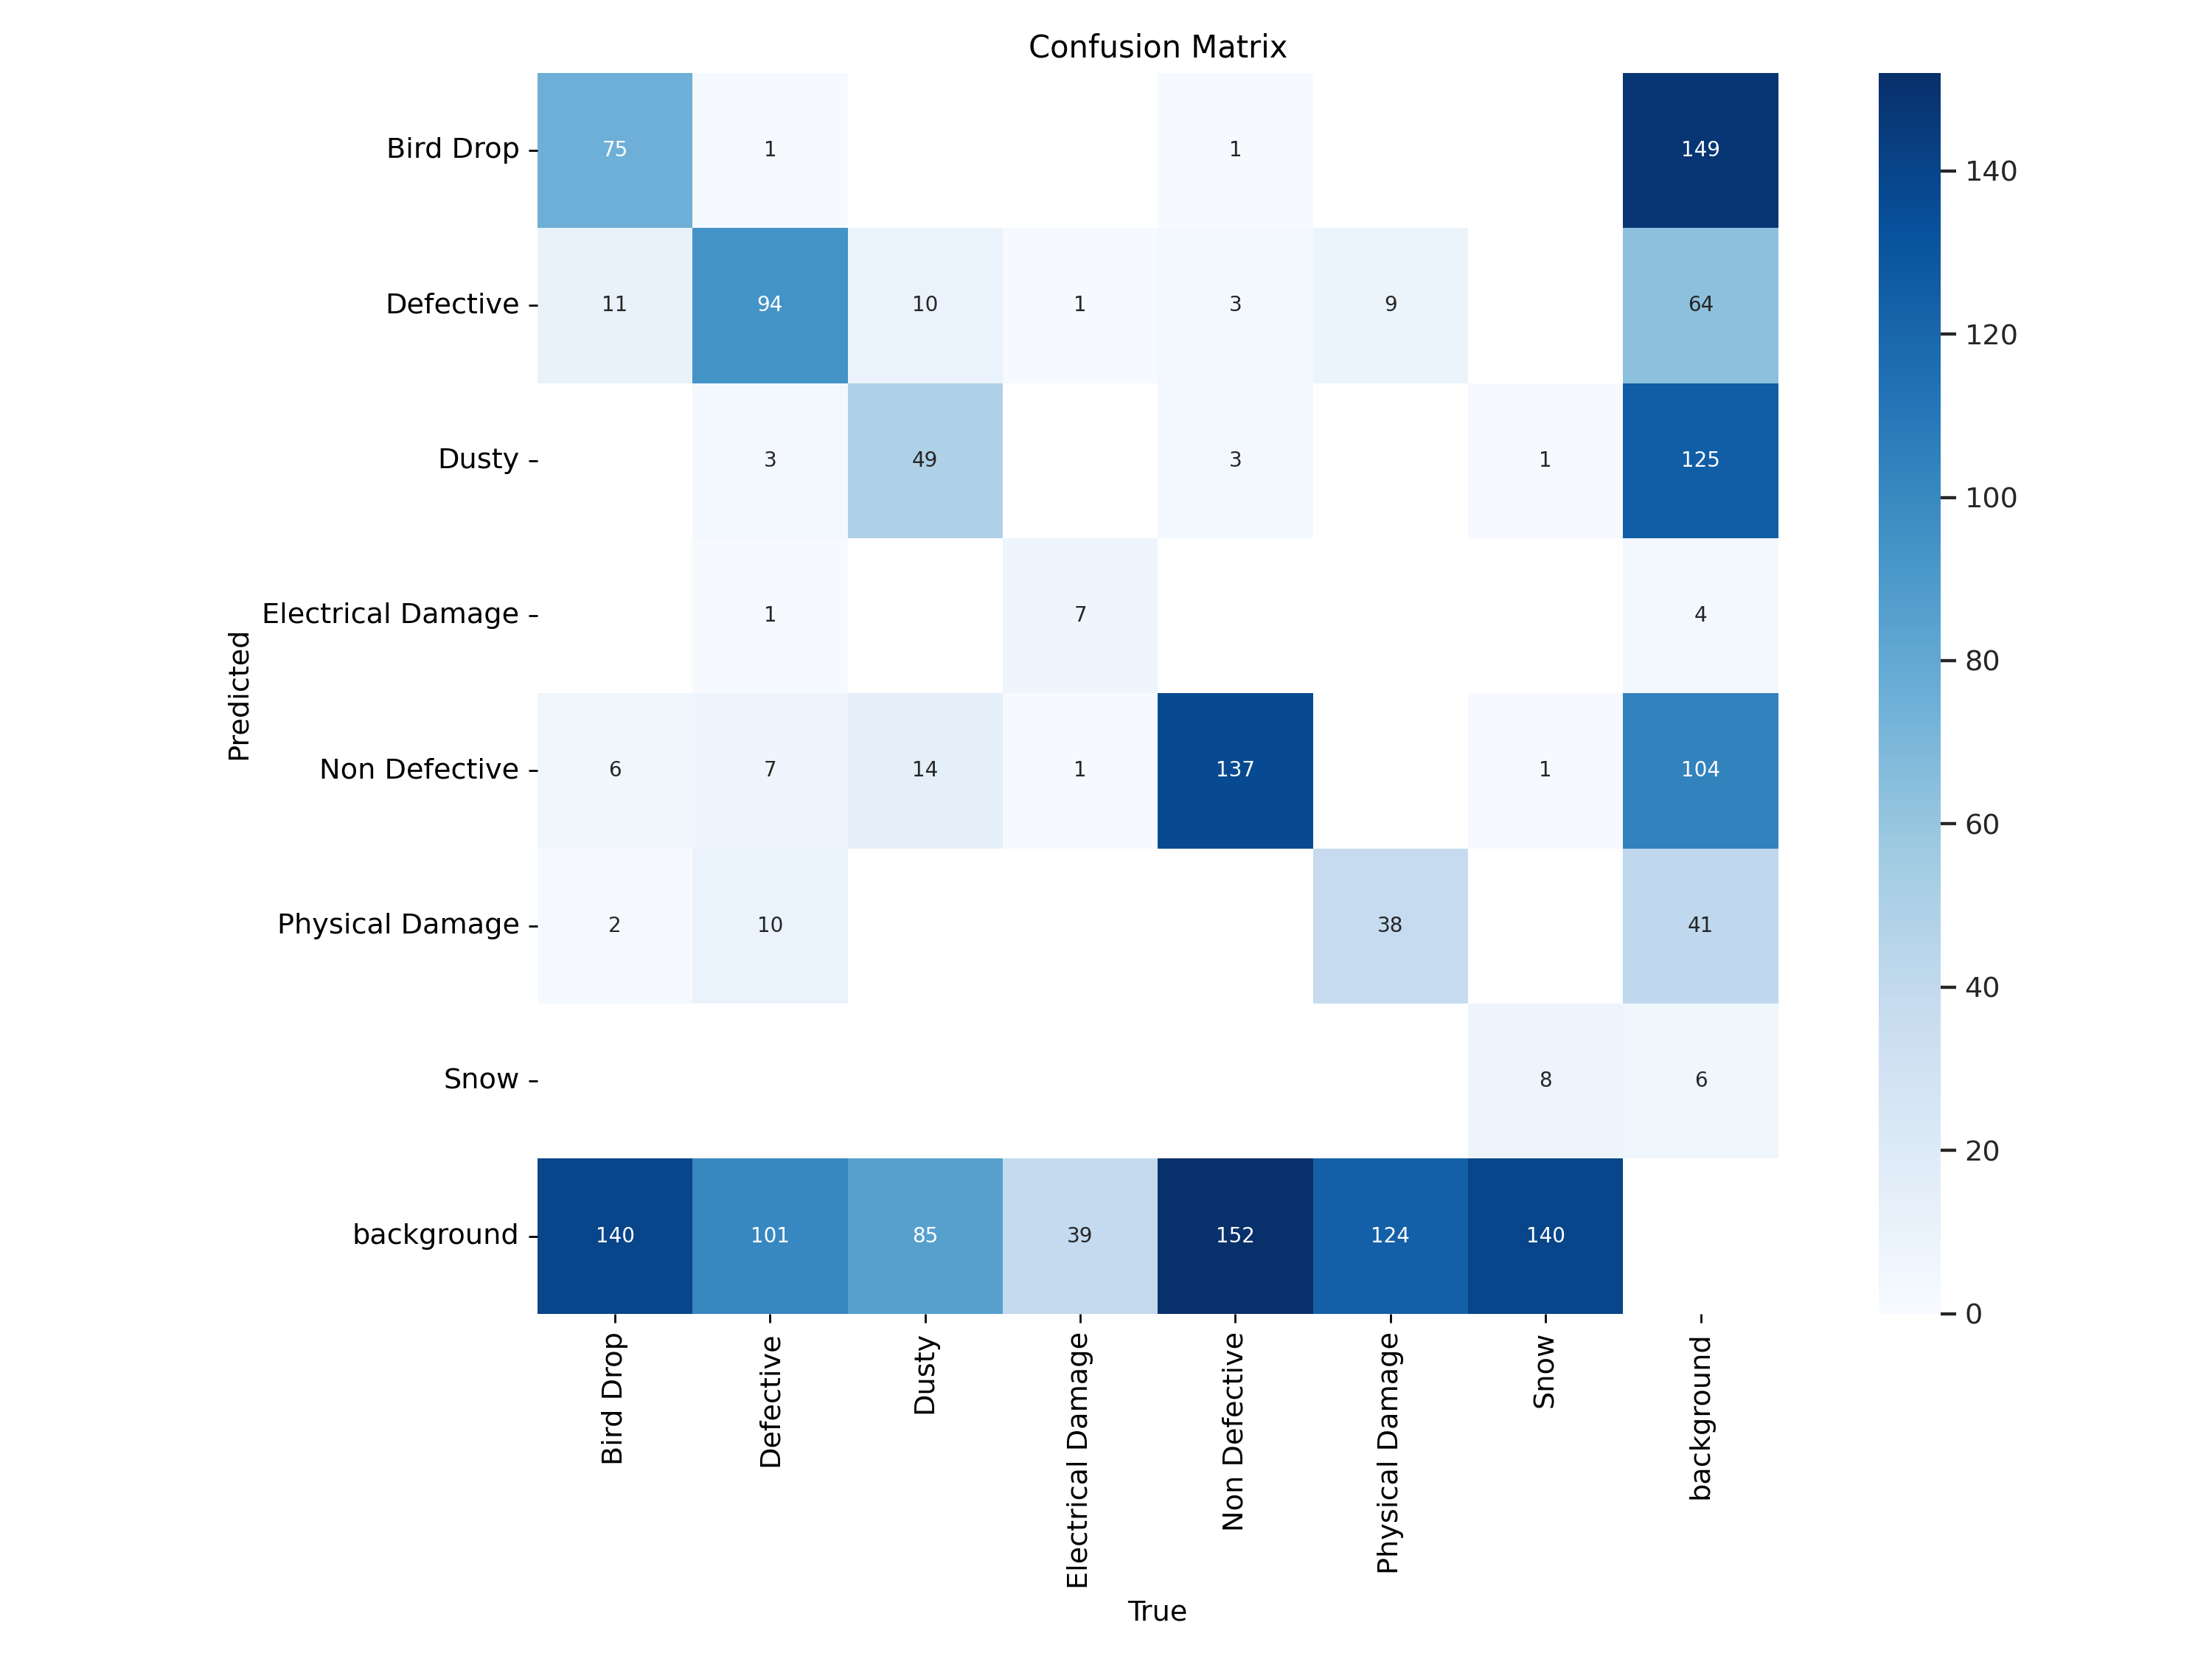

In [18]:
Image(filename="/content/runs/detect/train/confusion_matrix.png",width=600)

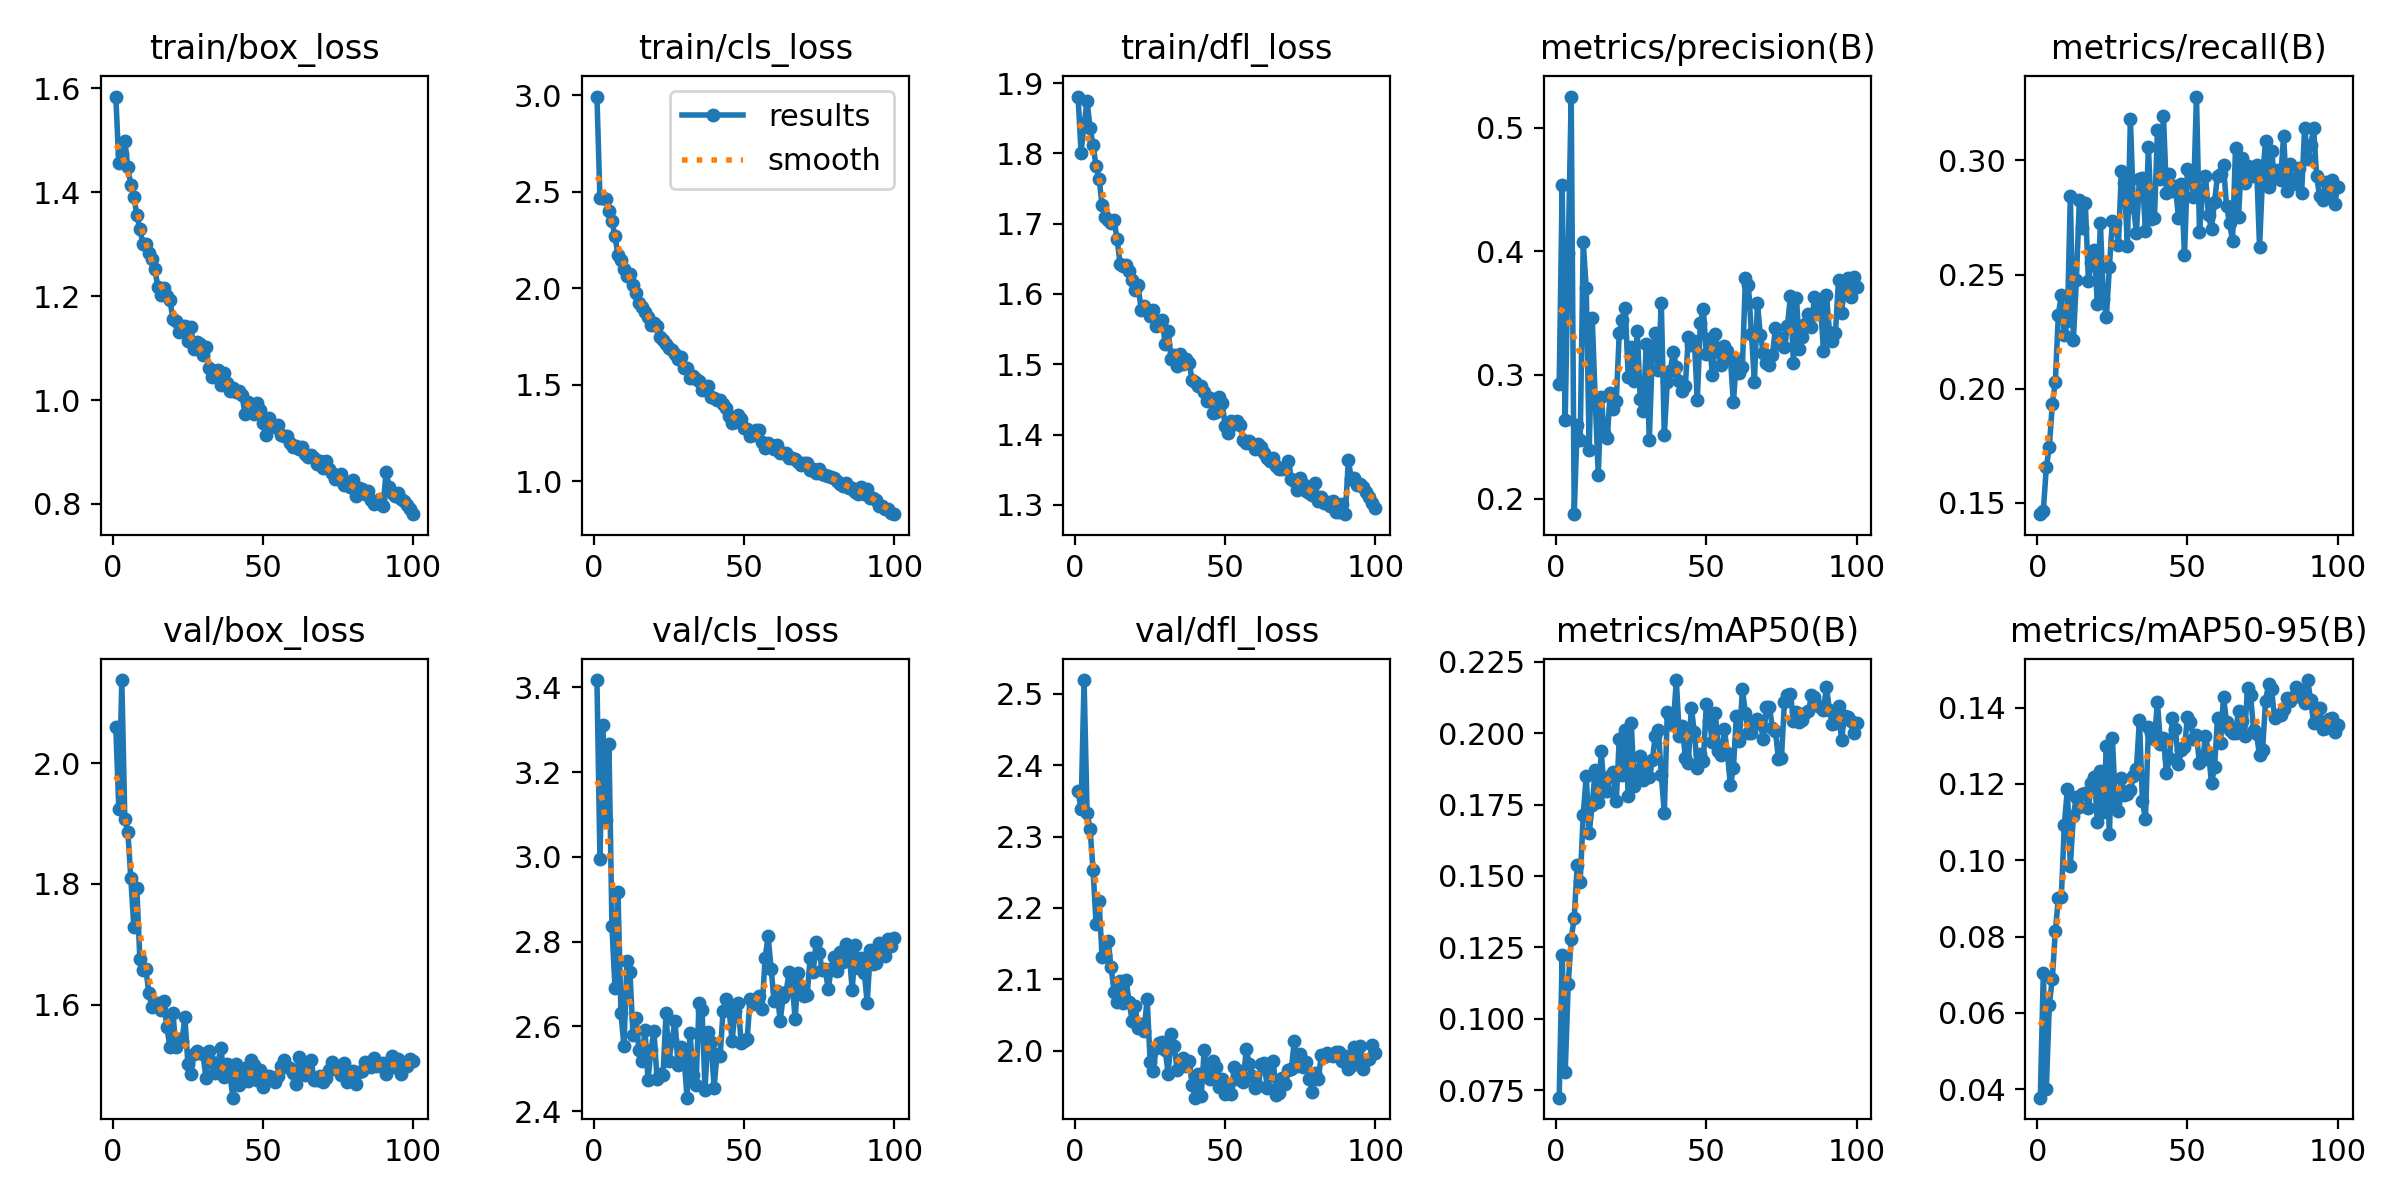

In [20]:
Image(filename='/content/runs/detect/train/results.png', width=600)

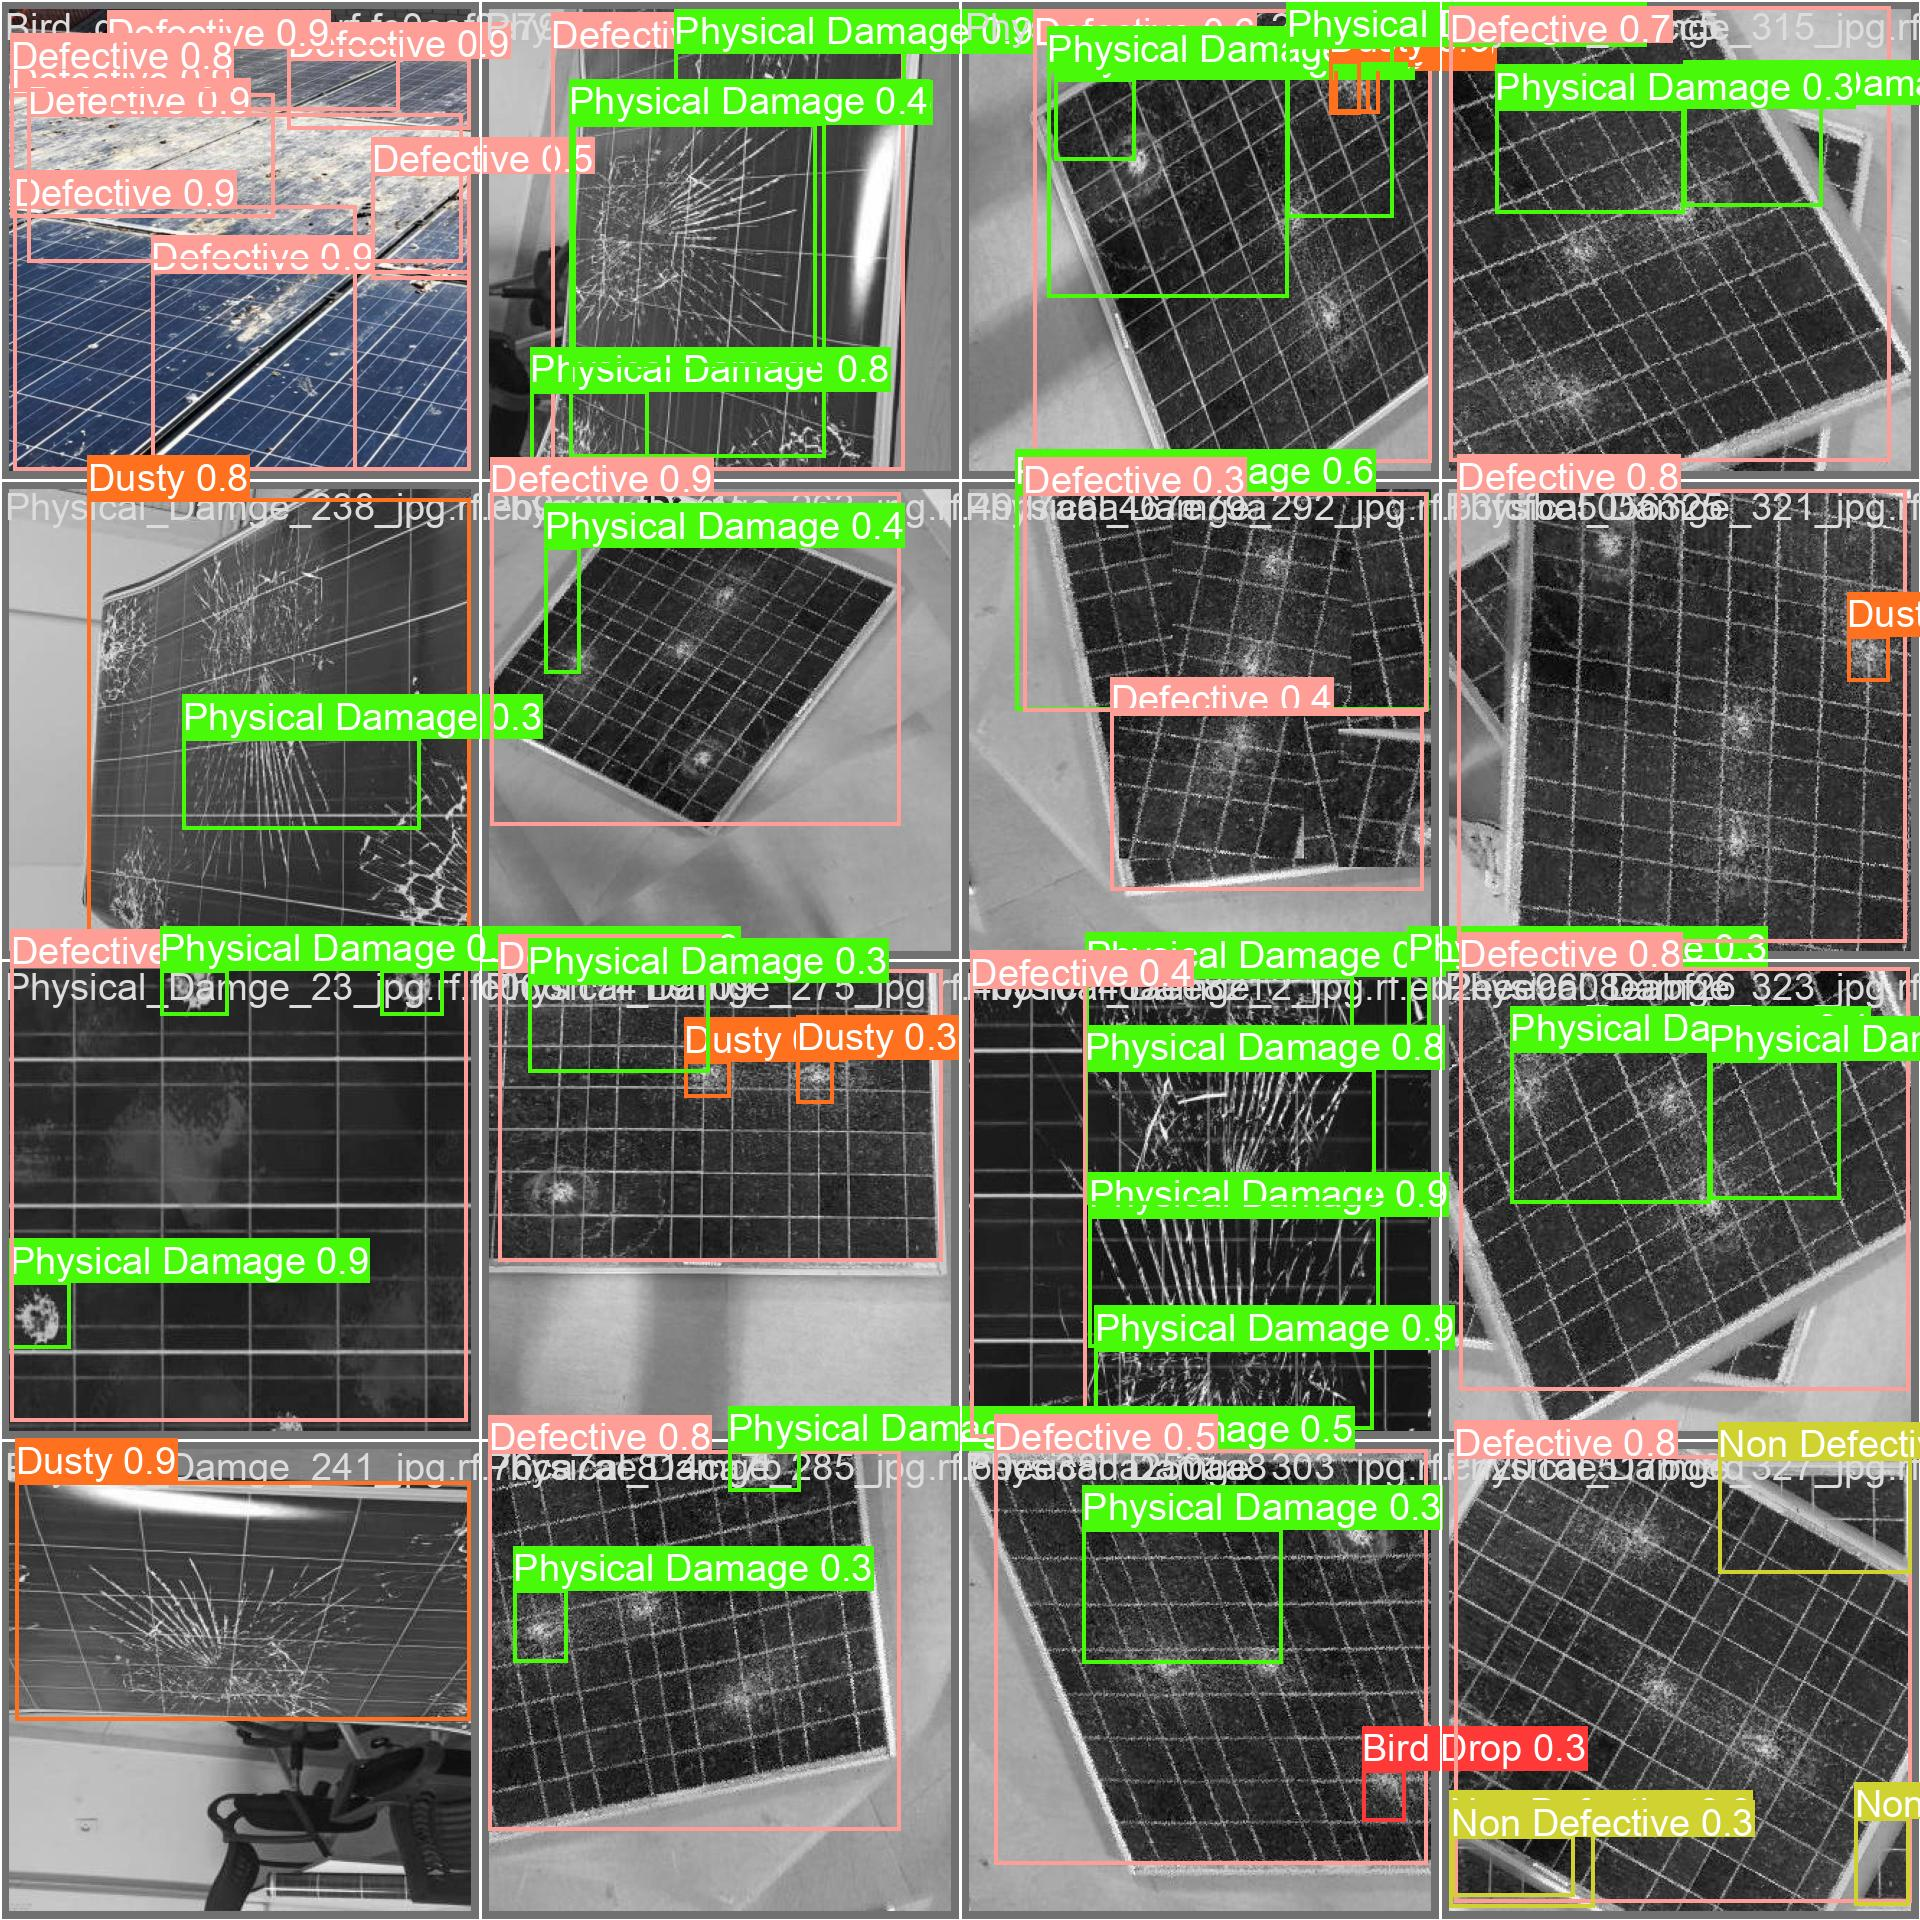

In [21]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

Validate Custom Model

In [22]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/Solar-panel-defects-1/valid/labels.cache... 171 images, 0 backgrounds, 0 corrupt: 100% 171/171 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1103, len(boxes) = 1274. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:07<00:00,  1.42it/s]
                   all        171       1274      0.363      0.3

Inference with Custom Model

In [23]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/107 /content/Solar-panel-defects-1/test/images/Bird_drop_10-Copy_jpg.rf.95015aebf4780538fd6ac190ca14a3ba.jpg: 800x800 5 Defectives, 22.5ms
image 2/107 /content/Solar-panel-defects-1/test/images/Bird_drop_104_jpg.rf.c1208e9539c67d3a6b5abfca92bca323.jpg: 800x800 4 Bird Drops, 11 Defectives, 22.5ms
image 3/107 /content/Solar-panel-defects-1/test/images/Bird_drop_16_jpg.rf.3f0c745bc1a27617d712ce980cef3a80.jpg: 800x800 6 Bird Drops, 2 Defectives, 22.5ms
image 4/107 /content/Solar-panel-defects-1/test/images/Bird_drop_1_jpg.rf.42360020ca70e691d6e83ee84d8d485c.jpg: 800x800 18 Bird Drops, 8 Defectives, 22.4ms
image 5/107 /content/Solar-panel-defects-1/test/images/Bird_drop_5_jpg.rf.110ea5d6078849babb20ce770f4243bd.jpg: 800x800 5 Bird Drops, 3 Defectives, 22.5ms
image 6/107 /con

In [24]:
from ultralytics import YOLO
# Load a model
model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

# Predict with the model
results = model('/content/runs/detect/predict/Bird_drop_10-Copy_jpg.rf.95015aebf4780538fd6ac190ca14a3ba.jpg')


image 1/1 /content/runs/detect/predict/Bird_drop_10-Copy_jpg.rf.95015aebf4780538fd6ac190ca14a3ba.jpg: 800x800 5 Defectives, 2 Non Defectives, 22.6ms
Speed: 7.5ms preprocess, 22.6ms inference, 519.3ms postprocess per image at shape (1, 3, 800, 800)


inference with Custom Model


In [27]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

image 1/107 /content/Solar-panel-defects-1/test/images/Bird_drop_10-Copy_jpg.rf.95015aebf4780538fd6ac190ca14a3ba.jpg: 800x800 5 Defectives, 23.2ms
image 2/107 /content/Solar-panel-defects-1/test/images/Bird_drop_104_jpg.rf.c1208e9539c67d3a6b5abfca92bca323.jpg: 800x800 4 Bird Drops, 11 Defectives, 22.8ms
image 3/107 /content/Solar-panel-defects-1/test/images/Bird_drop_16_jpg.rf.3f0c745bc1a27617d712ce980cef3a80.jpg: 800x800 6 Bird Drops, 2 Defectives, 22.5ms
image 4/107 /content/Solar-panel-defects-1/test/images/Bird_drop_1_jpg.rf.42360020ca70e691d6e83ee84d8d485c.jpg: 800x800 18 Bird Drops, 8 Defectives, 22.5ms
image 5/107 /content/Solar-panel-defects-1/test/images/Bird_drop_5_jpg.rf.110ea5d6078849babb20ce770f4243bd.jpg: 800x800 5 Bird Drops, 3 Defectives, 22.5ms
image 6/107 /content/Solar-panel-defects-1/test/images/Bir

In [28]:
infer =YOLO("/content/runs/detect/train/weights/best.pt")

In [29]:
infer.predict("/content/Solar-panel-defects-1/test/images", save=True)


image 1/107 /content/Solar-panel-defects-1/test/images/Bird_drop_10-Copy_jpg.rf.95015aebf4780538fd6ac190ca14a3ba.jpg: 800x800 5 Defectives, 27.2ms
image 2/107 /content/Solar-panel-defects-1/test/images/Bird_drop_104_jpg.rf.c1208e9539c67d3a6b5abfca92bca323.jpg: 800x800 4 Bird Drops, 11 Defectives, 33.1ms
image 3/107 /content/Solar-panel-defects-1/test/images/Bird_drop_16_jpg.rf.3f0c745bc1a27617d712ce980cef3a80.jpg: 800x800 6 Bird Drops, 2 Defectives, 22.6ms
image 4/107 /content/Solar-panel-defects-1/test/images/Bird_drop_1_jpg.rf.42360020ca70e691d6e83ee84d8d485c.jpg: 800x800 18 Bird Drops, 8 Defectives, 22.5ms
image 5/107 /content/Solar-panel-defects-1/test/images/Bird_drop_5_jpg.rf.110ea5d6078849babb20ce770f4243bd.jpg: 800x800 5 Bird Drops, 3 Defectives, 22.5ms
image 6/107 /content/Solar-panel-defects-1/test/images/Bird_drop_78_jpg.rf.92adf124eda9c546e6dccf36c46d615f.jpg: 800x800 2 Bird Drops, 22.7ms
image 7/107 /content/Solar-panel-defects-1/test/images/Bird_drop_83_jpg.rf.aaf0e48102

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Bird Drop', 1: 'Defective', 2: 'Dusty', 3: 'Electrical Damage', 4: 'Non Defective', 5: 'Physical Damage', 6: 'Snow'}
 orig_img: array([[[231, 232, 236],
         [231, 232, 236],
         [231, 232, 236],
         ...,
         [ 48,  85,  77],
         [ 42,  79,  71],
         [ 39,  76,  68]],
 
        [[231, 232, 236],
         [231, 232, 236],
         [231, 232, 236],
         ...,
         [ 61,  98,  90],
         [ 56,  93,  85],
         [ 50,  87,  79]],
 
        [[231, 232, 236],
         [231, 232, 236],
         [231, 232, 236],
         ...,
         [ 63, 100,  92],
         [ 59,  96,  88],
         [ 51,  88,  80]],
 
        ...,
 
        [[237, 226, 218],
         [231, 218, 210],
         [214, 201, 193],
         ...,
         [170, 157, 149],
         [127, 114, 106],
         [ 88,  75,  67]],
 
        [[232

In [32]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom trained model

# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.30GHz)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 11, 13125) (21.5 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 3.0s, saved as '/content/runs/detect/train/weights/best.onnx' (42.7 MB)

Export complete (6.6s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=800  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=800 data=/content/Solar-panel-defects-1/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train/weights/best.onnx'